<a href="https://colab.research.google.com/github/Fikrielang/Pemrograman-Python/blob/main/Fikri%20Elang%20K_1101208251_TTX-44-01_Tugas14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Python Minggu 14**

Nama : Fikri Elang Kesuma

NIM : 1101208251

Kelas : TTX 44-01

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

def PReceiver(Ptx, Lp, Gtx, Grx):
  Prx = Ptx-Lp+Gtx+Grx
  return Prx

def SNR (Prx, Bandwidth):
  no=-174+(10*np.log10(Bandwidth))
  no=10**(no/10)
  SNR= Prx/no
  return SNR

def Capacity (SNR, Bandwidth):
  c=Bandwidth*np.log2(1+SNR)
  return c

In [4]:
#Model Frekuensi 1800
f=1800
fa=900
fb=700
loca="urban"
locb="suburban"
locc= "open"
tower=80
user=1.5
dmin=300
dmax=1000
N=200
Ptx=30
Ptx=Ptx*1000
Ptx=10*np.log10(Ptx)
Gtx=10
Grx=2
Bandwidth= 5000000

#Perhitungang Daya Terima Berdasarkan Frekuensi
d=np.random.randint(dmin,dmax,N)
d=d[np.argsort(d)]
a= cos(f,loca,tower,user,d)
a=a[np.argsort(d)]
a1= PReceiver(Ptx,a,Gtx,Grx)
a1= 10**(a1/10)
b= cos(fa,loca,tower,user,d)
b=b[np.argsort(d)]
b1= PReceiver(Ptx,b,Gtx,Grx)
b1= 10**(b1/10)
c= cos(fb,loca,tower,user,d)
c=c[np.argsort(d)]
c1= PReceiver(Ptx,c,Gtx,Grx)
c1= 10**(c1/10)

#Perhitungan Daya Terima Berdasarkan Lokasi
aa= cos(f,loca,tower,user,d)
aa=aa[np.argsort(d)]
aa1= PReceiver(Ptx,aa,Gtx,Grx)
aa1= 10**(aa1/10)
bb= cos(f,locb,tower,user,d)
bb=bb[np.argsort(d)]
bb1= PReceiver(Ptx,bb,Gtx,Grx)
bb1= 10**(bb1/10)
cc= cos(f,locc,tower,user,d)
cc=cc[np.argsort(d)]
cc1= PReceiver(Ptx,cc,Gtx,Grx)
cc1= 10**(cc1/10)

#Perhitungan SNR Berdasarkan Frekuensi
SNR1= SNR(a1,Bandwidth)
SNR2= SNR(b1,Bandwidth)
SNR3= SNR(c1,Bandwidth)

#Perhitungan SNR Berdasarkan Lokasi
SNR11= SNR(aa1,Bandwidth)
SNR22= SNR(bb1,Bandwidth)
SNR33= SNR(cc1,Bandwidth)

#Perhitungan Capacity Berdasarkan Frekuensi
ca1 = Capacity(SNR1,Bandwidth)
ca2 = Capacity(SNR2,Bandwidth)
ca3 = Capacity(SNR3,Bandwidth)

#Perhitungan Capacity Berdasarkan Lokasi
ca11 = Capacity(SNR11,Bandwidth)
ca22 = Capacity(SNR22,Bandwidth)
ca33 = Capacity(SNR33,Bandwidth)

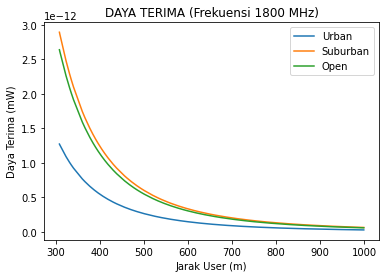

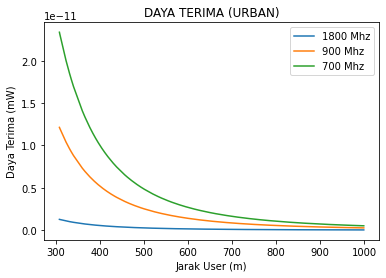

In [5]:
plt.figure("Frekuensi")
plt.title("DAYA TERIMA (Frekuensi 1800 MHz)")
plt.plot(d,aa1,label="Urban")
plt.plot(d,bb1,label="Suburban")
plt.plot(d,cc1,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Daya Terima (mW)")

plt.figure("Mode Urban")
plt.title("DAYA TERIMA (URBAN)")
plt.plot(d,a1,label="1800 Mhz")
plt.plot(d,b1,label="900 Mhz")
plt.plot(d,c1,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Daya Terima (mW)")
plt.show()

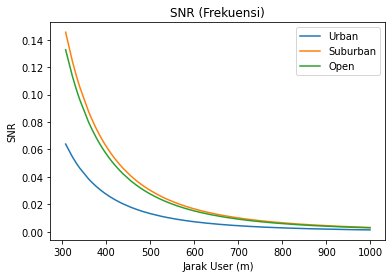

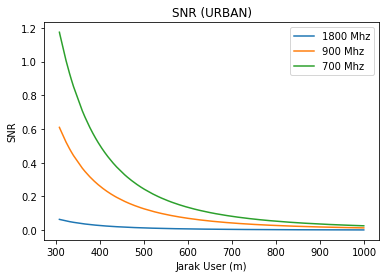

In [6]:
plt.figure("SNR Frekuensi")
plt.title("SNR (Frekuensi)")
plt.plot(d,SNR11,label="Urban")
plt.plot(d,SNR22,label="Suburban")
plt.plot(d,SNR33,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("SNR")

plt.figure("SNR Urban")
plt.title("SNR (URBAN)")
plt.plot(d,SNR1,label="1800 Mhz")
plt.plot(d,SNR2,label="900 Mhz")
plt.plot(d,SNR3,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("SNR")
plt.show()

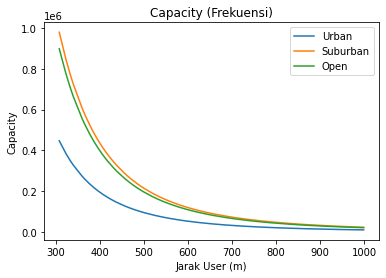

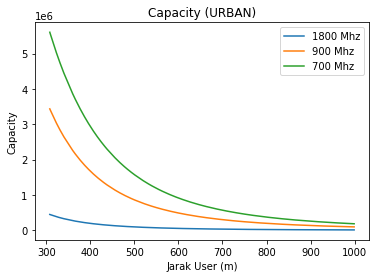

In [7]:
plt.figure("Capacity Frekuensi")
plt.title("Capacity (Frekuensi)")
plt.plot(d,ca11,label="Urban")
plt.plot(d,ca22,label="Suburban")
plt.plot(d,ca33,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Capacity")

plt.figure("Capacity Urban")
plt.title("Capacity (URBAN)")
plt.plot(d,ca1,label="1800 Mhz")
plt.plot(d,ca2,label="900 Mhz")
plt.plot(d,ca3,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Capacity")
plt.show()